In [1]:
import numpy as np
from PIL import Image 
import torch

c:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
img = Image.open('test_image_disp.jpeg')

image_path = "test_image_disp.jpeg"

input_image = Image.open(image_path).convert('RGB')
original_width, original_height = input_image.size

numpydata = np.asarray(img)
print(type(numpydata))
print(numpydata.shape)
print(numpydata)

<class 'numpy.ndarray'>
(235, 638, 3)
[[[ 21  14  56]
  [ 21  14  56]
  [ 21  14  56]
  ...
  [ 18  14  51]
  [ 18  14  51]
  [ 18  14  51]]

 [[ 21  14  56]
  [ 21  14  56]
  [ 21  14  56]
  ...
  [ 18  14  51]
  [ 18  14  51]
  [ 18  14  51]]

 [[ 21  14  56]
  [ 21  14  56]
  [ 21  14  56]
  ...
  [ 18  14  51]
  [ 18  14  51]
  [ 18  14  51]]

 ...

 [[252 252 192]
  [252 252 192]
  [252 252 192]
  ...
  [252 252 192]
  [252 252 192]
  [252 252 192]]

 [[252 252 192]
  [252 252 192]
  [252 252 192]
  ...
  [252 252 192]
  [252 252 192]
  [252 252 192]]

 [[252 252 192]
  [252 252 192]
  [252 252 192]
  ...
  [252 252 192]
  [252 252 192]
  [252 252 192]]]


In [3]:
numpydata

array([[[ 21,  14,  56],
        [ 21,  14,  56],
        [ 21,  14,  56],
        ...,
        [ 18,  14,  51],
        [ 18,  14,  51],
        [ 18,  14,  51]],

       [[ 21,  14,  56],
        [ 21,  14,  56],
        [ 21,  14,  56],
        ...,
        [ 18,  14,  51],
        [ 18,  14,  51],
        [ 18,  14,  51]],

       [[ 21,  14,  56],
        [ 21,  14,  56],
        [ 21,  14,  56],
        ...,
        [ 18,  14,  51],
        [ 18,  14,  51],
        [ 18,  14,  51]],

       ...,

       [[252, 252, 192],
        [252, 252, 192],
        [252, 252, 192],
        ...,
        [252, 252, 192],
        [252, 252, 192],
        [252, 252, 192]],

       [[252, 252, 192],
        [252, 252, 192],
        [252, 252, 192],
        ...,
        [252, 252, 192],
        [252, 252, 192],
        [252, 252, 192]],

       [[252, 252, 192],
        [252, 252, 192],
        [252, 252, 192],
        ...,
        [252, 252, 192],
        [252, 252, 192],
        [252, 252, 192]]

In [4]:
depth1 = np.load('test_image_depth.npy')
print(depth1)
depth1 = torch.from_numpy(depth1)

[[[[41.749367  41.763412  41.88405   ... 43.733303  43.715893
    43.575436 ]
   [41.42025   41.377644  41.53714   ... 43.724873  43.710663
    43.56718  ]
   [40.86246   40.86182   41.022602  ... 43.622025  43.571274
    43.45396  ]
   ...
   [ 5.4885254  5.546083   5.579774  ...  5.493807   5.475594
     5.458359 ]
   [ 5.4501595  5.5072565  5.5400386 ...  5.4379263  5.4212565
     5.4039254]
   [ 5.4148836  5.4727163  5.5116043 ...  5.3995214  5.381614
     5.365806 ]]]]


In [5]:
depth1

tensor([[[[41.7494, 41.7634, 41.8840,  ..., 43.7333, 43.7159, 43.5754],
          [41.4202, 41.3776, 41.5371,  ..., 43.7249, 43.7107, 43.5672],
          [40.8625, 40.8618, 41.0226,  ..., 43.6220, 43.5713, 43.4540],
          ...,
          [ 5.4885,  5.5461,  5.5798,  ...,  5.4938,  5.4756,  5.4584],
          [ 5.4502,  5.5073,  5.5400,  ...,  5.4379,  5.4213,  5.4039],
          [ 5.4149,  5.4727,  5.5116,  ...,  5.3995,  5.3816,  5.3658]]]])

In [6]:
depth1.shape

torch.Size([1, 1, 192, 640])

In [7]:
depth1_resized = torch.nn.functional.interpolate(depth1,
    (original_height, original_width), mode="bilinear", align_corners=False)

# Saving colormapped depth image
depth1_resized_np = depth1_resized.squeeze().cpu().numpy()
vmax = np.percentile(depth1_resized, 95)

In [8]:
depth1_resized_np

array([[41.74939  , 41.76398  , 41.88456  , ..., 43.732822 , 43.715973 ,
        43.57565  ],
       [41.51054  , 41.484226 , 41.63271  , ..., 43.726795 , 43.712166 ,
        43.569664 ],
       [41.117588 , 41.098537 , 41.258198 , ..., 43.66883  , 43.635197 ,
        43.50595  ],
       ...,
       [ 5.471065 ,  5.5284786,  5.5616584, ...,  5.468242 ,  5.45082  ,
         5.433485 ],
       [ 5.440567 ,  5.497939 ,  5.532302 , ...,  5.4273887,  5.410456 ,
         5.393489 ],
       [ 5.4149747,  5.4728994,  5.511648 , ...,  5.3995295,  5.3816986,
         5.3658304]], dtype=float32)

(235, 638)


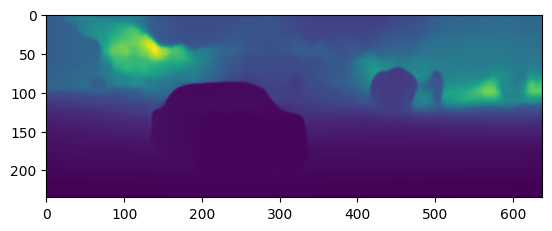

In [9]:
from matplotlib import pyplot as plt
import cv2 

print(depth1_resized_np.shape)
plt.imshow(depth1_resized_np)
plt.show()

In [10]:
depth1.shape

torch.Size([1, 1, 192, 640])

In [11]:
image_path = "street2_disp.jpeg"

input_image = Image.open(image_path).convert('RGB')
original_width, original_height = input_image.size

depth2 = np.load('street2_depth.npy')
depth2 = torch.from_numpy(depth2)

depth2_resized = torch.nn.functional.interpolate(depth2,
    (original_height, original_width), mode="bilinear", align_corners=False)

# Saving colormapped depth image
depth2_resized_np = depth2_resized.squeeze().cpu().numpy()
vmax = np.percentile(depth2_resized, 95)

In [12]:
depth2.shape

torch.Size([1, 1, 192, 640])

In [13]:
depth2

tensor([[[[36.4763, 36.7772, 36.9950,  ..., 26.6577, 26.7126, 26.6810],
          [36.6135, 36.9656, 37.1602,  ..., 26.6446, 26.7650, 26.6464],
          [36.7129, 37.0529, 37.2314,  ..., 26.5572, 26.5918, 26.5705],
          ...,
          [ 5.6388,  5.6581,  5.6768,  ...,  5.7034,  5.7026,  5.7128],
          [ 5.5994,  5.6174,  5.6372,  ...,  5.6475,  5.6481,  5.6587],
          [ 5.5677,  5.5850,  5.6086,  ...,  5.6068,  5.6073,  5.6169]]]])

In [14]:
depth2_resized_np.shape

(2448, 3264)

In [15]:
depth2_resized_np

array([[36.47633  , 36.47633  , 36.47633  , ..., 26.680967 , 26.680967 ,
        26.680967 ],
       [36.47633  , 36.47633  , 36.47633  , ..., 26.680967 , 26.680967 ,
        26.680967 ],
       [36.47633  , 36.47633  , 36.47633  , ..., 26.680967 , 26.680967 ,
        26.680967 ],
       ...,
       [ 5.5676794,  5.5676794,  5.5676794, ...,  5.6168523,  5.6168528,
         5.616852 ],
       [ 5.5676794,  5.5676794,  5.5676794, ...,  5.6168523,  5.616852 ,
         5.6168523],
       [ 5.5676794,  5.5676794,  5.5676794, ...,  5.6168523,  5.6168523,
         5.616852 ]], dtype=float32)

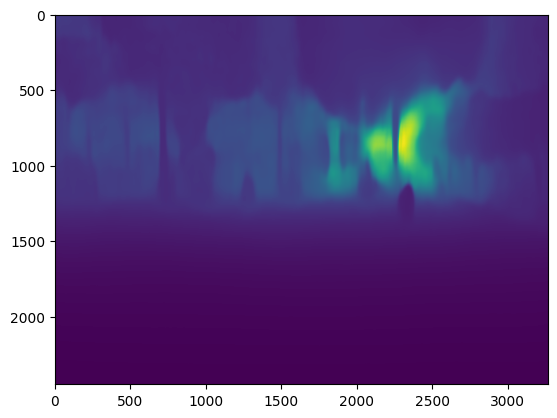

In [16]:
from matplotlib import pyplot as plt
plt.imshow(depth2_resized_np)
plt.show()

(192, 640)
<class 'numpy.ndarray'>


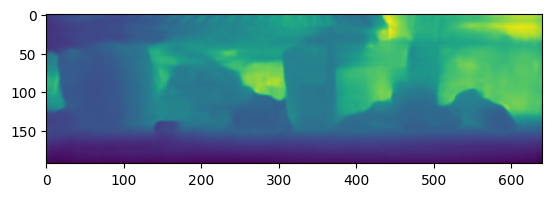

In [17]:
depth3 = np.load('vtv_depth.npy')
vtv= depth3[0, 0]
print(vtv.shape)
print(type(vtv))
plt.imshow(vtv)
plt.show()